# <center> <span style="color:#f6f794"> Hipótesis Frecuentes en Análisis de Airbnb: </span> </center>

#### <span style="color:#f6f794"> 1. IMPORTAR LIBRERÍAS NECESARIAS </span>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [18]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


#### <span style="color:#f6f794"> 2. CARGAR Y EXPLORAR EL DATASET </span> 

In [ ]:
# CARGAR LOS DATOS
df = pd.read_csv('/Users/andresuescum/Bootcamp/Airbnb-Analysis/data/airbnb_cleaned.csv.gz')

In [26]:
url = "https://raw.githubusercontent.com/Yael-Parra/Airbnb-Analysis/feature/data-processing-pipeline/processed_data/airbnb_complete.csv.gz"
try:
    df = pd.read_csv(url, compression='gzip')
    print(f"Dataset cargado exitosamente")
    print(f"Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")
except Exception as e:
    print(f"Error al cargar: {e}")
    print("💡 Alternativa: descarga el archivo y usa pd.read_csv('Airbnb-Analysis/data/airbnb_cleaned.csv.gz')")


Error al cargar: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)>
💡 Alternativa: descarga el archivo y usa pd.read_csv('Airbnb-Analysis/data/airbnb_cleaned.csv.gz')


#### <span style="color:#f6f794"> 3. ANÁLISIS EXPLORATORIO INICIAL </span> 

In [27]:
def explorar_dataset(df):
    """Función para exploración inicial del dataset"""
    
    print("=" * 50)
    print("INFORMACIÓN GENERAL DEL DATASET")
    print("=" * 50)
    
    # Información básica
    print(f"Dimensiones: {df.shape}")
    print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n PRIMERAS 5 FILAS:")
    display(df.head())
    
    print("\n📊 INFORMACIÓN DE COLUMNAS:")
    print(df.info())
    
    print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
    display(df.describe())
    
    print("\nVALORES NULOS:")
    null_counts = df.isnull().sum()
    null_percentages = (null_counts / len(df)) * 100
    null_info = pd.DataFrame({
        'Nulos': null_counts,
        'Porcentaje': null_percentages
    }).sort_values('Nulos', ascending=False)
    display(null_info[null_info['Nulos'] > 0])
    
    # Identificar tipos de variables
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\n🔢 Variables numéricas ({len(numeric_cols)}): {numeric_cols}")
    print(f"🏷️  Variables categóricas ({len(categorical_cols)}): {categorical_cols}")
    
    return numeric_cols, categorical_cols

# Ejecutar exploración
numeric_cols, categorical_cols = explorar_dataset(df)

INFORMACIÓN GENERAL DEL DATASET
Dimensiones: (220031, 17)
Memoria utilizada: 98.03 MB

 PRIMERAS 5 FILAS:


,id,name,host_id,host_name,city,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,price_USD
0,2539,Clean & quiet apt home by the park,2787,John,New York,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6.0,365.0,149,149.0
1,2595,Skylit Midtown Castle,2845,Jennifer,New York,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2.0,355.0,225,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,New York,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,1.0,365.0,150,150.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,New York,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1.0,194.0,89,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,New York,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1.0,0.0,80,80.0



📊 INFORMACIÓN DE COLUMNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              220031 non-null  int64  
 1   name                            220031 non-null  object 
 2   host_id                         220031 non-null  int64  
 3   host_name                       220031 non-null  object 
 4   city                            220031 non-null  object 
 5   neighbourhood_group             220031 non-null  object 
 6   neighbourhood                   220031 non-null  object 
 7   latitude                        220031 non-null  float64
 8   longitude                       220031 non-null  float64
 9   room_type                       220031 non-null  object 
 10  minimum_nights                  220031 non-null  int64  
 11  number_of_reviews               220031 non-null  i

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,price_USD
count,2.200310e+05,2.200310e+05,220031.000000,220031.000000,220031.000000,220031.000000,220031.000000,208565.000000,220031.000000,2.200310e+05,220031.000000
mean,2.240831e+07,8.494528e+07,32.573053,16.428135,5.258023,20.129164,0.944819,14.189471,120.403526,9.178157e+02,158.612187
std,1.175490e+07,8.856607e+07,30.144854,76.030471,20.118261,43.012277,1.430133,75.122354,131.103156,8.285217e+03,323.145623
min,2.539000e+03,1.944000e+03,-34.135212,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,1.338370e+07,1.439602e+07,40.412620,-3.705870,1.000000,1.000000,0.000000,1.000000,0.000000,5.500000e+01,61.885564
50%,2.249789e+07,4.640392e+07,40.794240,-0.128380,2.000000,4.000000,0.320000,1.000000,77.000000,9.900000e+01,102.000000
75%,3.155445e+07,1.415097e+08,51.496200,9.199535,4.000000,19.000000,1.290000,3.000000,225.000000,1.770000e+02,172.931922
max,5.095505e+07,4.117208e+08,51.681690,151.339811,1250.000000,896.000000,58.500000,999.000000,365.000000,1.000046e+06,17078.756579



VALORES NULOS:


,Nulos,Porcentaje
calculated_host_listings_count,11466,5.211084



🔢 Variables numéricas (11): ['id', 'host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price', 'price_USD']
🏷️  Variables categóricas (6): ['name', 'host_name', 'city', 'neighbourhood_group', 'neighbourhood', 'room_type']


#### <span style="color:#f6f794"> 4. GENERADOR AUTOMÁTICO DE HIPÓTESIS </span>

In [ ]:
def generar_hipotesis(df, numeric_cols, categorical_cols):
    """Genera hipótesis automáticas basadas en las columnas del dataset""" 
    hipotesis = []
    
    # Identificar columnas clave
    price_cols = [col for col in numeric_cols if 'price' in col.lower() or 'cost' in col.lower()]
    rating_cols = [col for col in numeric_cols if any(word in col.lower() for word in ['rating', 'review', 'score'])]
    location_cols = [col for col in categorical_cols if any(word in col.lower() for word in ['city', 'location', 'neighbourhood', 'district', 'area'])]
    property_cols = [col for col in categorical_cols if any(word in col.lower() for word in ['room_type', 'property_type', 'type'])]
    capacity_cols = [col for col in numeric_cols if any(word in col.lower() for word in ['accommodates', 'guests', 'capacity', 'bedrooms', 'beds'])]
    amenity_cols = [col for col in numeric_cols if 'amenities' in col.lower()]
    availability_cols = [col for col in numeric_cols if 'availability' in col.lower()]
    
    print("🔬 HIPÓTESIS GENERADAS AUTOMÁTICAMENTE")
    print("=" * 60)
    
    # HIPÓTESIS DE PRECIO
    if price_cols:
        price_col = price_cols[0]
        
        if location_cols:
            hipotesis.append({
                'id': 'H1',
                'categoria': 'Precio vs Ubicación',
                'hipotesis_nula': f'No existen diferencias significativas en {price_col} entre diferentes {location_cols[0]}',
                'hipotesis_alternativa': f'Existen diferencias significativas en {price_col} entre diferentes {location_cols[0]}',
                'variables': [price_col, location_cols[0]],
                'tipo_test': 'ANOVA / Kruskal-Wallis',
                'justificacion': 'Las ubicaciones premium (centro, zonas turísticas) suelen tener precios más altos'
            })
        
        if property_cols:
            hipotesis.append({
                'id': 'H2',
                'categoria': 'Precio vs Tipo de Propiedad',
                'hipotesis_nula': f'No existen diferencias significativas en {price_col} entre diferentes {property_cols[0]}',
                'hipotesis_alternativa': f'Existen diferencias significativas en {price_col} entre diferentes {property_cols[0]}',
                'variables': [price_col, property_cols[0]],
                'tipo_test': 'ANOVA / Kruskal-Wallis',
                'justificacion': 'Casas enteras generalmente cuestan más que habitaciones privadas o compartidas'
            })
        
        if rating_cols:
            hipotesis.append({
                'id': 'H3',
                'categoria': 'Precio vs Calidad',
                'hipotesis_nula': f'No existe correlación entre {price_col} y {rating_cols[0]}',
                'hipotesis_alternativa': f'Existe correlación positiva entre {price_col} y {rating_cols[0]}',
                'variables': [price_col, rating_cols[0]],
                'tipo_test': 'Correlación de Pearson/Spearman',
                'justificacion': 'Propiedades con mejores calificaciones pueden justificar precios más altos'
            })
        
        if capacity_cols:
            hipotesis.append({
                'id': 'H4',
                'categoria': 'Precio vs Capacidad',
                'hipotesis_nula': f'No existe correlación entre {price_col} y {capacity_cols[0]}',
                'hipotesis_alternativa': f'Existe correlación positiva entre {price_col} y {capacity_cols[0]}',
                'variables': [price_col, capacity_cols[0]],
                'tipo_test': 'Correlación de Pearson/Spearman',
                'justificacion': 'Propiedades con mayor capacidad generalmente tienen precios más altos'
            })
    
    # HIPÓTESIS DE CALIFICACIONES
    if rating_cols:
        rating_col = rating_cols[0]
        
        if location_cols:
            hipotesis.append({
                'id': 'H5',
                'categoria': 'Calificación vs Ubicación',
                'hipotesis_nula': f'No existen diferencias significativas en {rating_col} entre diferentes {location_cols[0]}',
                'hipotesis_alternativa': f'Existen diferencias significativas en {rating_col} entre diferentes {location_cols[0]}',
                'variables': [rating_col, location_cols[0]],
                'tipo_test': 'ANOVA / Kruskal-Wallis',
                'justificacion': 'Algunas ubicaciones pueden ofrecer mejor experiencia que otras'
            })
        
        if amenity_cols:
            hipotesis.append({
                'id': 'H6',
                'categoria': 'Calificación vs Amenidades',
                'hipotesis_nula': f'No existe correlación entre {rating_col} y número de amenidades',
                'hipotesis_alternativa': f'Existe correlación positiva entre {rating_col} y número de amenidades',
                'variables': [rating_col, amenity_cols[0]],
                'tipo_test': 'Correlación de Pearson/Spearman',
                'justificacion': 'Más amenidades deberían resultar en mejor experiencia del huésped'
            })
    
    # HIPÓTESIS DE DISPONIBILIDAD
    if availability_cols and price_cols:
        hipotesis.append({
            'id': 'H7',
            'categoria': 'Disponibilidad vs Precio',
            'hipotesis_nula': f'No existe correlación entre {availability_cols[0]} y {price_cols[0]}',
            'hipotesis_alternativa': f'Existe correlación negativa entre {availability_cols[0]} y {price_cols[0]}',
            'variables': [availability_cols[0], price_cols[0]],
            'tipo_test': 'Correlación de Pearson/Spearman',
            'justificacion': 'Mayor disponibilidad podría indicar menor demanda y precios más bajos'
        })
    
    # Mostrar hipótesis generadas
    for i, hip in enumerate(hipotesis, 1):
        print(f"\n{hip['id']} - {hip['categoria']}")
        print("-" * 40)
        print(f"H0: {hip['hipotesis_nula']}")
        print(f"H1: {hip['hipotesis_alternativa']}")
        print(f"Variables: {', '.join(hip['variables'])}")
        print(f"Test sugerido: {hip['tipo_test']}")
        print(f"Justificación: {hip['justificacion']}")
    
    return hipotesis

# Generar hipótesis
hipotesis_generadas = generar_hipotesis(df, numeric_cols, categorical_cols)

🔬 HIPÓTESIS GENERADAS AUTOMÁTICAMENTE



H1 - Precio vs Ubicación
----------------------------------------
H0: No existen diferencias significativas en price entre diferentes city
H1: Existen diferencias significativas en price entre diferentes city
Variables: price, city
Test sugerido: ANOVA / Kruskal-Wallis
Justificación: Las ubicaciones premium (centro, zonas turísticas) suelen tener precios más altos

H2 - Precio vs Tipo de Propiedad
----------------------------------------
H0: No existen diferencias significativas en price entre diferentes room_type
H1: Existen diferencias significativas en price entre diferentes room_type
Variables: price, room_type
Test sugerido: ANOVA / Kruskal-Wallis
Justificación: Casas enteras generalmente cuestan más que habitaciones privadas o compartidas

H3 - Precio vs Calidad
----------------------------------------
H0: No existe correlación entre price y number_of_reviews
H1: Existe correlación positiva entre price y number_of_reviews
Variables: price, number_of_reviews
Test sugerido: Corre

#### <span style="color:#f6f794"> 5. FUNCIONES PARA VALIDAR HIPÓTESIS </span>

In [ ]:

def validar_hipotesis_correlacion(df, var1, var2, alpha=0.05):
    """Valida hipótesis de correlación entre dos variables numéricas"""
    
    # Limpiar datos
    data_clean = df[[var1, var2]].dropna()
    
    if len(data_clean) < 10:
        print(f"❌ Datos insuficientes para {var1} vs {var2}")
        return
    
    print(f"\n🔍 ANÁLISIS DE CORRELACIÓN: {var1} vs {var2}")
    print("=" * 60)
    
    # Correlación de Pearson
    corr_pearson, p_value_pearson = stats.pearsonr(data_clean[var1], data_clean[var2])
    
    # Correlación de Spearman (no paramétrica)
    corr_spearman, p_value_spearman = stats.spearmanr(data_clean[var1], data_clean[var2])
    
    print(f"📊 Correlación de Pearson: {corr_pearson:.4f} (p-value: {p_value_pearson:.4f})")
    print(f"📊 Correlación de Spearman: {corr_spearman:.4f} (p-value: {p_value_spearman:.4f})")
    
    # Interpretación
    if p_value_pearson < alpha:
        print(f"✅ Rechazamos H0: Existe correlación significativa (α = {alpha})")
        if abs(corr_pearson) > 0.7:
            fuerza = "fuerte"
        elif abs(corr_pearson) > 0.3:
            fuerza = "moderada"
        else:
            fuerza = "débil"
        direccion = "positiva" if corr_pearson > 0 else "negativa"
        print(f"📈 Correlación {fuerza} {direccion}")
    else:
        print(f"No rechazamos H0: No hay evidencia de correlación significativa")
    
    # Visualización
    plt.figure(figsize=(10, 6))
    plt.scatter(data_clean[var1], data_clean[var2], alpha=0.6)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Correlación: {var1} vs {var2}\nPearson r = {corr_pearson:.3f}, p = {p_value_pearson:.3f}')
    
    # Línea de tendencia
    z = np.polyfit(data_clean[var1], data_clean[var2], 1)
    p = np.poly1d(z)
    plt.plot(data_clean[var1], p(data_clean[var1]), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()

def validar_hipotesis_grupos(df, var_numerica, var_categorica, alpha=0.05):
    """Valida hipótesis de diferencias entre grupos"""
    
    # Limpiar datos
    data_clean = df[[var_numerica, var_categorica]].dropna()
    
    if len(data_clean) < 10:
        print(f"Datos insuficientes para {var_numerica} vs {var_categorica}")
        return
    
    print(f"\n🔍 ANÁLISIS DE GRUPOS: {var_numerica} por {var_categorica}")
    print("=" * 60)
    
    # Agrupar datos
    grupos = [group[var_numerica].values for name, group in data_clean.groupby(var_categorica)]
    nombres_grupos = [name for name, group in data_clean.groupby(var_categorica)]
    
    print(f"📊 Número de grupos: {len(grupos)}")
    for i, nombre in enumerate(nombres_grupos):
        print(f"  - {nombre}: {len(grupos[i])} observaciones")
    
    # Estadísticas descriptivas por grupo
    stats_grupos = data_clean.groupby(var_categorica)[var_numerica].agg(['count', 'mean', 'std', 'median'])
    print(f"\n📈 Estadísticas por grupo:")
    display(stats_grupos)
    
    # Test de normalidad (Shapiro-Wilk para muestras pequeñas)
    print(f"\n🧪 Tests de normalidad por grupo:")
    normal_groups = []
    for i, (nombre, grupo_data) in enumerate(zip(nombres_grupos, grupos)):
        if len(grupo_data) >= 3:
            stat, p_val = stats.shapiro(grupo_data[:5000])  # Límite para Shapiro-Wilk
            is_normal = p_val > alpha
            normal_groups.append(is_normal)
            print(f"  - {nombre}: {'Normal' if is_normal else 'No normal'} (p = {p_val:.4f})")
        else:
            normal_groups.append(False)
    
    # Seleccionar test apropiado
    if len(grupos) == 2:
        # Dos grupos: t-test o Mann-Whitney U
        if all(normal_groups) and len(grupos[0]) > 30 and len(grupos[1]) > 30:
            # T-test
            stat, p_value = stats.ttest_ind(grupos[0], grupos[1])
            test_used = "T-test independiente"
        else:
            # Mann-Whitney U (no paramétrico)
            stat, p_value = stats.mannwhitneyu(grupos[0], grupos[1], alternative='two-sided')
            test_used = "Mann-Whitney U"
    else:
        # Más de dos grupos: ANOVA o Kruskal-Wallis
        if all(normal_groups):
            # ANOVA
            stat, p_value = stats.f_oneway(*grupos)
            test_used = "ANOVA"
        else:
            # Kruskal-Wallis (no paramétrico)
            stat, p_value = stats.kruskal(*grupos)
            test_used = "Kruskal-Wallis"
    
    print(f"\n🧪 {test_used}:")
    print(f"   Estadístico: {stat:.4f}")
    print(f"   P-value: {p_value:.4f}")
    
    # Interpretación
    if p_value < alpha:
        print(f"✅ Rechazamos H0: Existen diferencias significativas entre grupos (α = {alpha})")
    else:
        print(f"❌ No rechazamos H0: No hay evidencia de diferencias significativas")
    
    # Visualización
    plt.figure(figsize=(12, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    data_clean.boxplot(column=var_numerica, by=var_categorica, ax=plt.gca())
    plt.title(f'Distribución de {var_numerica} por {var_categorica}')
    plt.suptitle('')
    
    # Histograma por grupos
    plt.subplot(1, 2, 2)
    for nombre, grupo_data in zip(nombres_grupos, grupos):
        plt.hist(grupo_data, alpha=0.7, label=nombre, bins=20)
    plt.xlabel(var_numerica)
    plt.ylabel('Frecuencia')
    plt.title('Distribuciones por grupo')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

#### <span style="color:#f6f794"> 5. VALIDACIÓN DE HIPÓTESIS </span>


🚀 VALIDACIÓN AUTOMÁTICA DE HIPÓTESIS

🔍 ANÁLISIS DE GRUPOS: price por city
📊 Número de grupos: 6
  - London: 85068 observaciones
  - Madrid: 19618 observaciones
  - Milan: 18322 observaciones
  - New York: 48895 observaciones
  - Sydney: 36662 observaciones
  - Tokyo: 11466 observaciones

📈 Estadísticas por grupo:


,count,mean,std,median
city,,,,
London,85068,122.336766,220.749123,84.0
Madrid,19618,129.271740,484.143545,58.0
Milan,18322,115.094913,290.793019,73.5
New York,48895,152.720687,240.154170,106.0
Sydney,36662,207.689597,323.818795,136.0
Tokyo,11466,14984.697977,33273.448191,10007.0



🧪 Tests de normalidad por grupo:
  - London: No normal (p = 0.0000)
  - Madrid: No normal (p = 0.0000)
  - Milan: No normal (p = 0.0000)
  - New York: No normal (p = 0.0000)
  - Sydney: No normal (p = 0.0000)
  - Tokyo: No normal (p = 0.0000)

🧪 Kruskal-Wallis:
   Estadístico: 49918.0406
   P-value: 0.0000
✅ Rechazamos H0: Existen diferencias significativas entre grupos (α = 0.05)


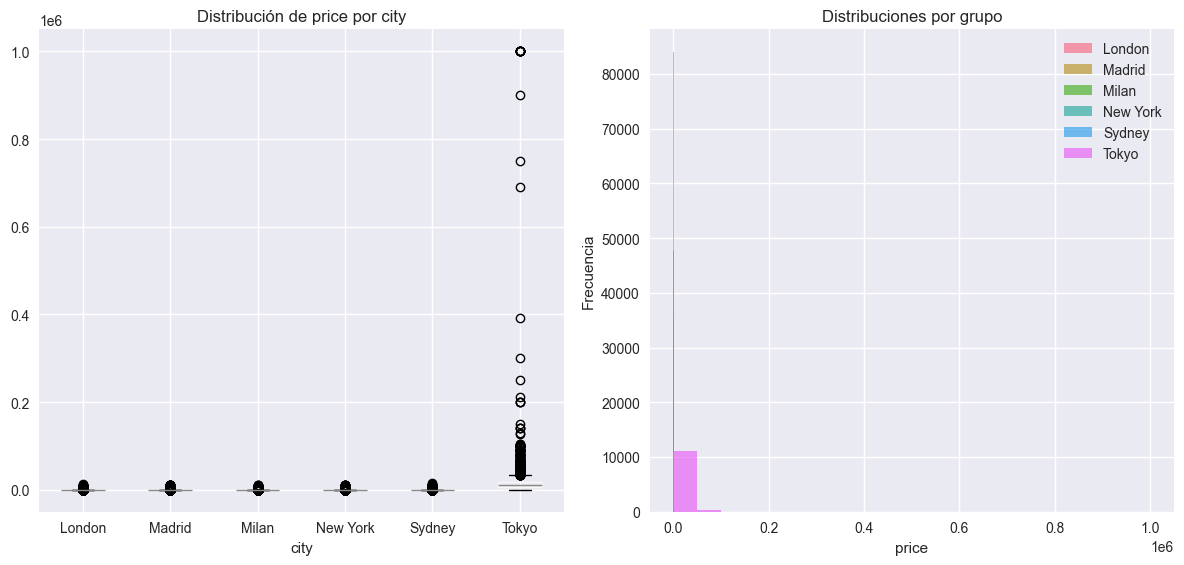


🔍 ANÁLISIS DE GRUPOS: price por room_type
📊 Número de grupos: 4
  - Entire home/apt: 128154 observaciones
  - Hotel room: 1353 observaciones
  - Private room: 86512 observaciones
  - Shared room: 4012 observaciones

📈 Estadísticas por grupo:


,count,mean,std,median
room_type,,,,
Entire home/apt,128154,1240.367277,10408.313959,140.0
Hotel room,1353,258.767923,778.766078,135.0
Private room,86512,437.010669,3632.817958,55.0
Shared room,4012,1204.660768,3309.511462,50.0



🧪 Tests de normalidad por grupo:
  - Entire home/apt: No normal (p = 0.0000)
  - Hotel room: No normal (p = 0.0000)
  - Private room: No normal (p = 0.0000)
  - Shared room: No normal (p = 0.0000)

🧪 Kruskal-Wallis:
   Estadístico: 69438.6501
   P-value: 0.0000
✅ Rechazamos H0: Existen diferencias significativas entre grupos (α = 0.05)


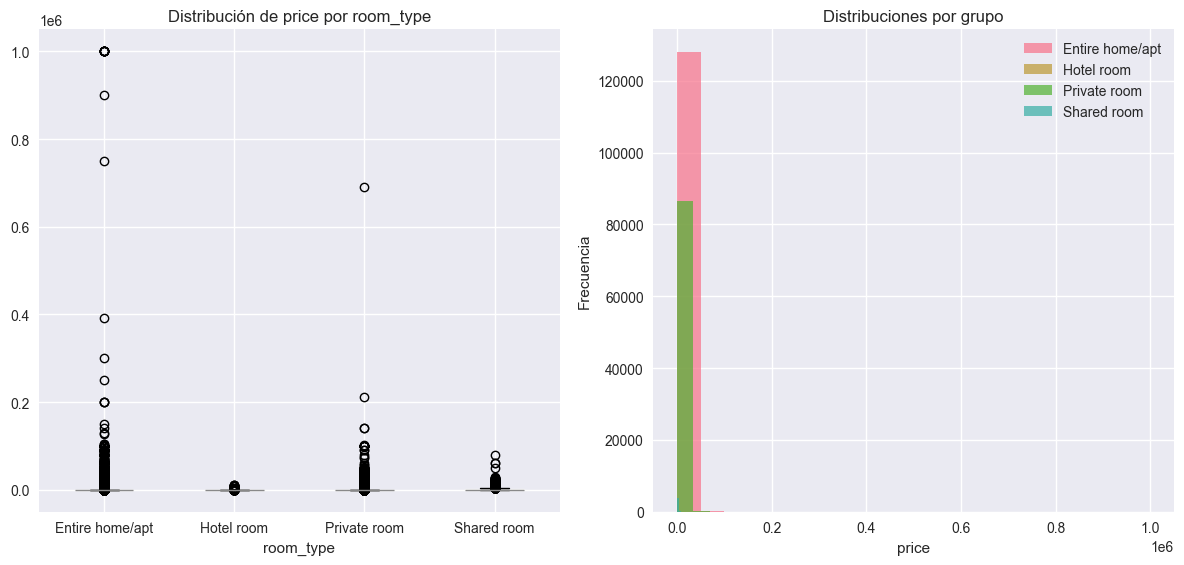


🔍 ANÁLISIS DE CORRELACIÓN: price vs number_of_reviews
📊 Correlación de Pearson: 0.0114 (p-value: 0.0000)
📊 Correlación de Spearman: -0.0539 (p-value: 0.0000)
✅ Rechazamos H0: Existe correlación significativa (α = 0.05)
📈 Correlación débil positiva


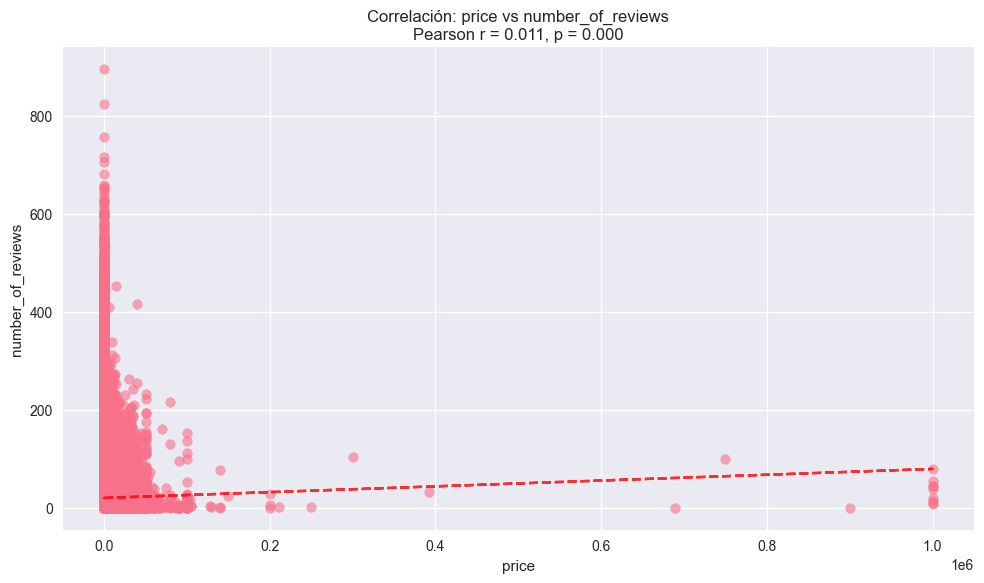

In [29]:
# 6. EJEMPLO DE VALIDACIÓN DE HIPÓTESIS
# ===================================

print("\n🚀 VALIDACIÓN AUTOMÁTICA DE HIPÓTESIS")
print("=" * 60)

# Validar las primeras 3 hipótesis generadas
for hip in hipotesis_generadas[:3]:
    try:
        var1, var2 = hip['variables'][0], hip['variables'][1]
        
        if hip['tipo_test'] in ['Correlación de Pearson/Spearman']:
            validar_hipotesis_correlacion(df, var1, var2)
        else:
            validar_hipotesis_grupos(df, var1, var2)
            
    except Exception as e:
        print(f"Error validando {hip['id']}: {e}")

#### <span style="color:#f6f794"> 7. MATRIZ DE CORRELACIÓN GENERAL </span>


📊 MATRIZ DE CORRELACIÓN


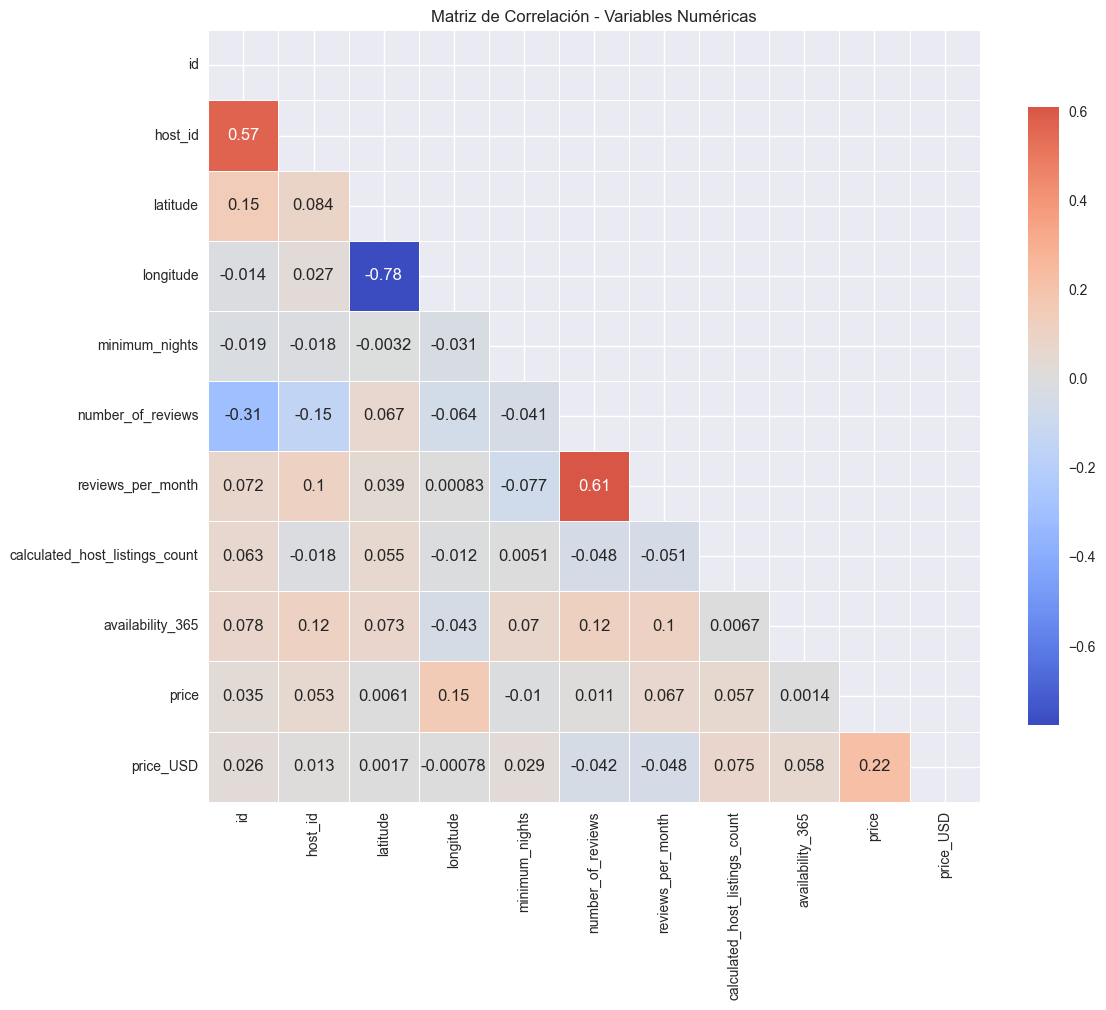


🔥 TOP 10 CORRELACIONES MÁS FUERTES:
 1. latitude vs longitude: -0.776 ↘️
 2. number_of_reviews vs reviews_per_month: +0.608 ↗️
 3. id vs host_id: +0.567 ↗️
 4. id vs number_of_reviews: -0.307 ↘️
 5. price vs price_USD: +0.224 ↗️
 6. longitude vs price: +0.154 ↗️
 7. host_id vs number_of_reviews: -0.147 ↘️
 8. id vs latitude: +0.146 ↗️
 9. number_of_reviews vs availability_365: +0.121 ↗️
10. host_id vs availability_365: +0.116 ↗️


In [28]:
def crear_matriz_correlacion(df, numeric_cols):
    """Crea matriz de correlación para variables numéricas"""
    
    if len(numeric_cols) < 2:
        print("❌ Necesitas al menos 2 variables numéricas para correlación")
        return
    
    print("\n📊 MATRIZ DE CORRELACIÓN")
    print("=" * 40)
    
    # Seleccionar solo columnas numéricas con datos suficientes
    df_numeric = df[numeric_cols].select_dtypes(include=[np.number])
    
    # Calcular matriz de correlación
    corr_matrix = df_numeric.corr()
    
    # Visualizar
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.tight_layout()
    plt.show()
    
    # Correlaciones más fuertes
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            var1, var2 = corr_matrix.columns[i], corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            if not np.isnan(corr_val):
                corr_pairs.append((var1, var2, abs(corr_val), corr_val))
    
    # Ordenar por correlación absoluta
    corr_pairs.sort(key=lambda x: x[2], reverse=True)
    
    print("\n🔥 TOP 10 CORRELACIONES MÁS FUERTES:")
    for i, (var1, var2, abs_corr, corr) in enumerate(corr_pairs[:10], 1):
        direccion = "↗️" if corr > 0 else "↘️"
        print(f"{i:2d}. {var1} vs {var2}: {corr:+.3f} {direccion}")

# Crear matriz de correlación
crear_matriz_correlacion(df, numeric_cols)